Gathering the Data :

● We have used the following three pieces of data in a Jupyter Notebook titled wrangle_act.ipynb:

a. The “WeRateDogs” Twitter archive. The file has been downloaded manually. Link : data/twitter_archive_enhanced.csv

b. The Tweet Image Predictions. This file (image_predictions.tsv) is hosted on Udacity's servers and was downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image -predictions/image-predictions.tsv

c. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

this  our data after cleaning it we have two data set df and df_image 

#### Acssecing it 

In [3]:
df = pd.read_csv('twitter_archive_master.csv')
df_image = pd.read_csv('image_pred_wrangled.csv')

##### we will drop the unwanted column "unecessery"  
    like Unnamed: 0 in df data frame and also in df_image 
    so it will drop in the cell bellow it happen becouse of the creating a 
    cv file from previouse data frame

In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df_image.drop('Unnamed: 0',axis=1, inplace=True)


seeing the first five row of the data set in the df

In [5]:
df.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,41048.0


see the first five row of the df_image to see if there is any thing wrong with it 

In [6]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


see the number of not null in data set and type of data to see if there is any thing we can chang or to test our cleaning in the previouse notebook

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 10 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
stage                 344 non-null object
retweet_count         2153 non-null float64
favorite_count        2153 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 168.3+ KB


In [20]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count'],
      dtype='object')

to see the total of null value we have in each column 

In [18]:
df.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
expanded_urls           54
rating_numerator         0
rating_denominator       0
name                     0
stage                 1809
retweet_count            0
favorite_count           0
dtype: int64

### Insight 
from the data will always come after we asking the question after we analysis the data to answer the question 

### Question 1: Are the ratings by WeRateDogs has relation  with the retweet count and favorite count?


here we plot the rating_numerator  and retweet count  using scatter plot in panda lib and we specify the rating _numerator to be less than 15 becouse after that it will have a some data that are outlier and will make our analysis worser so we dismis it   

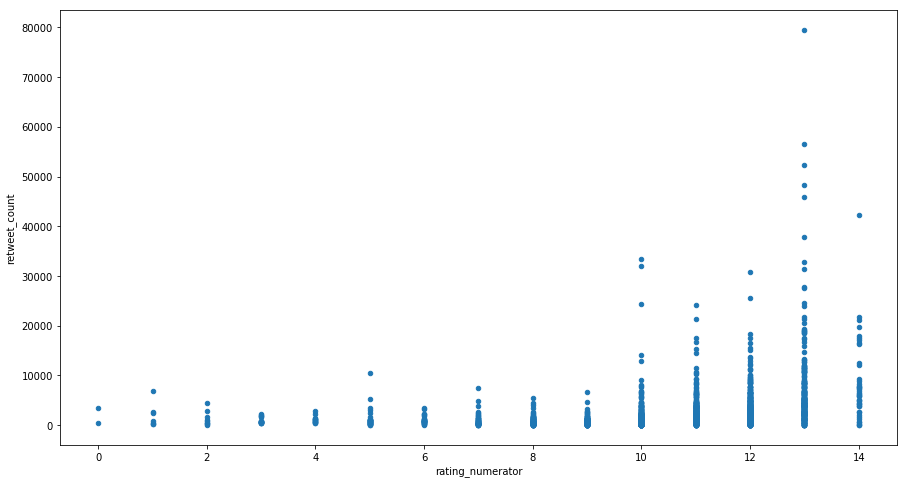

In [10]:
df[df['rating_numerator']<15].plot(x='rating_numerator',y='retweet_count',kind='scatter',figsize=(15,8));

there  ralation  between the retweet_count and rating_numerator but if the rating_numerator below 15 so from our anlaysis the rating numerator have relatin with retweet count and also the rating after 10 have much more retweet count and the highest is 13

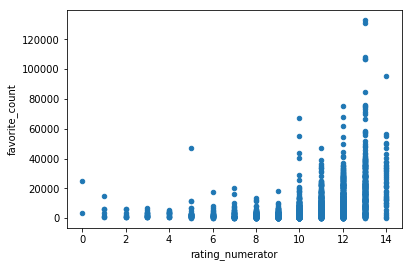

In [11]:
# look at the relationship between 'rating_numerator' and 'favorite count'

df[df['rating_numerator']<15].plot(x='rating_numerator',y='favorite_count',kind='scatter');


### Q2 Which stage of dogs got the highest retweet counts ?

here we trying to answer what stage of dog get the highest retweet count 
we are using stage after we make sure that isnot null and visualze it with fav count

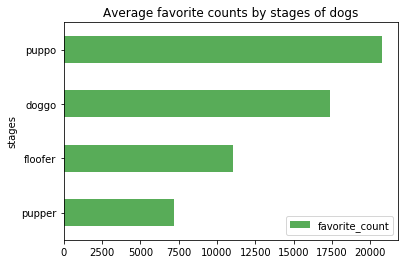

In [12]:
# we didnt need null value to analysis in our data frame
df_stage = df[df["stage"].isnull()==False]
#visualization 'Average favorite counts by stages of dogs'
by_stages = df_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
favorite_counts_by_stages = pd.DataFrame(by_stages.groupby('stage').favorite_count.mean().sort_values())
favorite_counts_by_stages['stages'] = favorite_counts_by_stages.index
favorite_counts_by_stages.plot(x="stages",y='favorite_count',kind='barh',title="Average favorite counts by stages of dogs",color='g', alpha=0.655)


Insight: The stage of Puppo got the highest retweet counts and favorite
counts, which is almost 3 times higher than the breed of pupper
its the same as retwet count and favourite count top 3 are the same. 

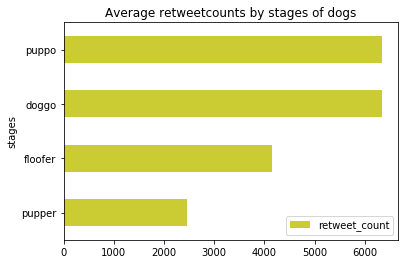

In [13]:
#visualization 'Average retweet counts by stages of dogs'

retweet_count_by_stages = pd.DataFrame(by_stages.groupby('stage').retweet_count.mean().sort_values())
retweet_count_by_stages['stages'] = favorite_counts_by_stages.index
retweet_count_by_stages.plot(x="stages",y='retweet_count',kind='barh',title="Average retweetcounts by stages of dogs",color='y', alpha=0.8)

insight: puppo ,doggo and floofer got the heighest retweet_ count so the top 3 
is puppo adn doggo adn floofer  lets see if it will be the same top 3 for the favourite tweet .

### q3Analyzing number of tweets posted by WeRateDogs' over time

here we are tying to see what are the number of tweet changes over time 

In [22]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    299
2015-12    386
2016-01    189
2016-02    123
2016-03    133
2016-04     58
2016-05     59
2016-06     93
2016-07     96
2016-08     63
2016-09     69
2016-10     73
2016-11     58
2016-12     58
2017-01     70
2017-02     70
2017-03     57
2017-04     49
2017-05     45
2017-06     50
2017-07     53
2017-08      2
Name: timestamp, dtype: int64

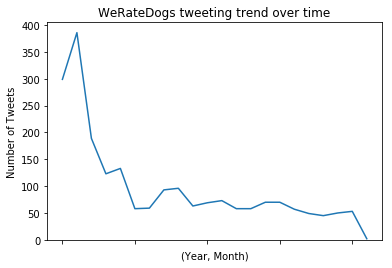

In [23]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

the number of tweets is decreasing over time

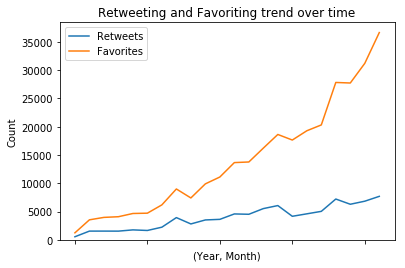

In [24]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

the number  of favourit and retweeetin is icreasing over

WeRateDogs, a Twitter account started in 2015, tweeted a lot in its starting days. For example, it posted
around 300 tweets in the month of November 2015, which increased to around 350 tweets in exactly the next
month. However, its tweeting activity reduced drastically in the subsequent months, averaging between 50 to
100 since April, 2016 